In [1]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

print(resp)

print(resp.headers)

cov_id_raw = resp.json()
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())


<Response [200]>
{'Server': 'nginx', 'Date': 'Sun, 18 Oct 2020 12:19:17 GMT', 'Content-Type': 'application/json', 'Last-Modified': 'Sun, 18 Oct 2020 12:17:45 GMT', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'ETag': 'W/"5f8c3269-15878"', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}
Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [2]:
cov_id_update = cov_id_raw['update']
print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :',cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2020-10-18
Jumlah penambahan kasus sembuh : 3732
Jumlah penambahan kasus meninggal : 80
Jumlah total kasus positif hingga saat ini : 361867
Jumlah total kasus meninggal hingga saat ini : 12511


In [3]:
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 30043
Persentase kematian akibat COVID-19 di Jawa Barat         : 1.860666.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 66.318277.2%


In [4]:
import numpy as np
import pandas as pd
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       230 non-null    int64
 1   KASUS                         230 non-null    int64
 2   MENINGGAL                     230 non-null    int64
 3   SEMBUH                        230 non-null    int64
 4   DIRAWAT_OR_ISOLASI            230 non-null    int64
 5   AKUMULASI_KASUS               230 non-null    int64
 6   AKUMULASI_SEMBUH              230 non-null    int64
 7   AKUMULASI_MENINGGAL           230 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  230 non-null    int64
dtypes: int64(9)
memory usage: 16.3 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583107200000      3          0       0                   3   
1  1583193600000      1          1       0   

In [5]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
                                                    if item.startswith('AKUMULASI')
                                                    or item.startswith('DIRAWAT')])
                                                    .rename(columns=str.lower)
                                                    .rename(columns={'kasus': 'kasus_baru'})
                                                    )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-02           3          0       0
1 2020-03-03           1          1       0
2 2020-03-04           1          0       0
3 2020-03-05           1          0       0
4 2020-03-06           1          0       0


<Figure size 432x288 with 0 Axes>

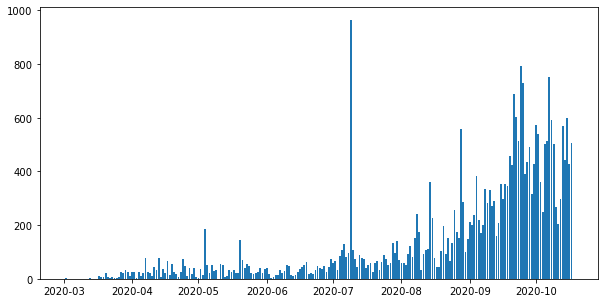

In [6]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

<Figure size 432x288 with 0 Axes>

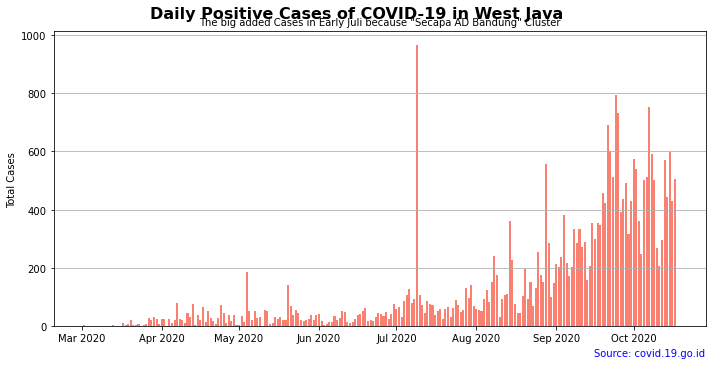

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Daily Positive Cases of COVID-19 in West Java', y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('The big added Cases in Early Juli because "Secapa AD Bandung" Cluster',fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Total Cases')
ax.text(1, -0.1, 'Source: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

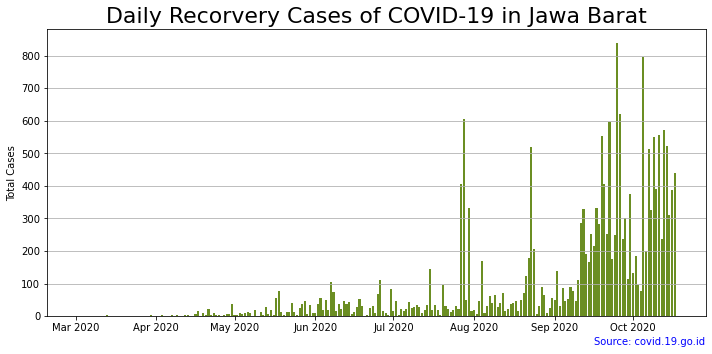

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Daily Recorvery Cases of COVID-19 in Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Total Cases')
ax.text(1, -0.1, 'Source: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

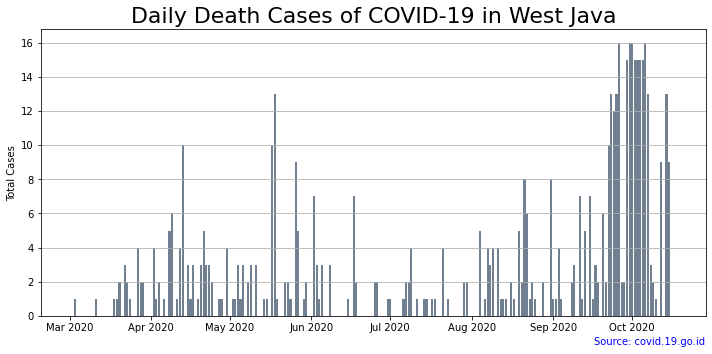

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Daily Death Cases of COVID-19 in West Java',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Total Cases')
ax.text(1, -0.1, 'Source: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [10]:
#Apakah Pekan ini Lebih Baik?
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     33 non-null     int64
 1   pekan_ke  33 non-null     int64
 2   jumlah    33 non-null     int64
dtypes: int64(3)
memory usage: 920.0 bytes
None


In [11]:
#menambah kolom jumlah pekan lalu dan lebih baik
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       7                 0       False
1   2020        11       5                 7        True
2   2020        12      52                 5       False
3   2020        13     104                52       False
4   2020        14     122               104       False
5   2020        15     233               122       False
6   2020        16     276               233       False
7   2020        17     211               276        True
8   2020        18     158               211        True
9   2020        19     371               158       False


<Figure size 432x288 with 0 Axes>

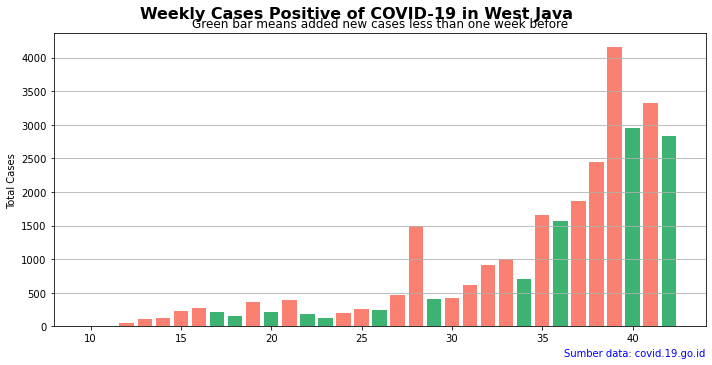

In [21]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax=plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_pekanan, x='pekan_ke', height='jumlah', 
	   color=['mediumseagreen' if x is True else 'salmon' for x in cov_jabar_pekanan['lebih_baik']])
fig.suptitle('Weekly Cases Positive of COVID-19 in West Java',
			 y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Green bar means added new cases less than one week before',
			 fontsize=12)
ax.set_xlabel=('')
ax.set_ylabel('Total Cases')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', 
		ha='right', transform=ax.transAxes)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [13]:
#Pola dan Dinamika
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
cov_jabar_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
225,2020-10-13,9266,18263,532
226,2020-10-14,9174,18784,545
227,2020-10-15,9454,19093,554
228,2020-10-16,9495,19480,554
229,2020-10-17,9560,19920,554


<Figure size 432x288 with 0 Axes>

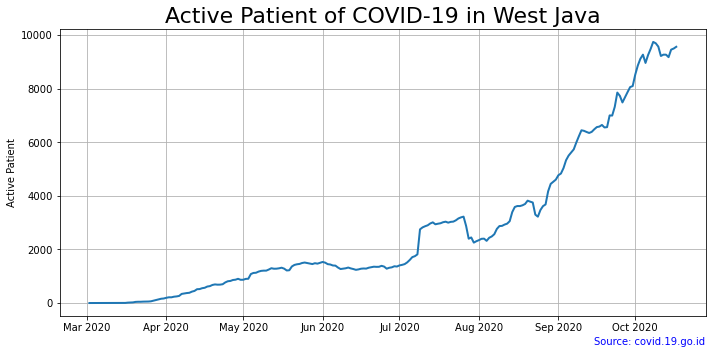

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Active Patient of COVID-19 in West Java',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Active Patient')
ax.text(1, -0.1, 'Source: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

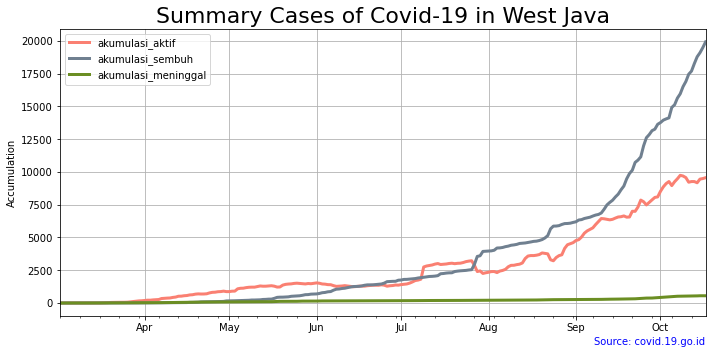

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax= plt.subplots(figsize=(10,5))
cov_jabar_akumulasi.plot(x='tanggal', kind='line',ax=ax, lw=3,
						 color=['salmon','slategrey','olivedrab'])
ax.set_title('Summary Cases of Covid-19 in West Java',
			 fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Accumulation')
ax.text(1, -0.1, 'Source: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()